<a href="https://colab.research.google.com/github/Gitjesus22/Rstudio/blob/main/7.2.Prueba_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table><tr>
<td><img src="https://solariabiodata.com.mx/wp-content/uploads/2021/07/logo_red.png" alt="Soluciones de siguiente generacion" width=200/>
<td>
<td>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/160px-R_logo.svg.png">
</tr></table>

## Pruebas de hipótesis

Se puede hacer una inferencia al realizar una afirmación acerca de un valor que puede tomar un parámetro estadístico de una población. Dicha afirmación puede estar basada en experiencia o alguna creencia, la cual será contrastada con la evidencia que tenemos a través de la información que nos proporciona una muestra. A este proceso se le conoce como _prueba de hipótesis_.

Para realizar la prueba se requieren 4 componentes:

 - **Hipótesis nula ($H_{0}$)** específica solo un valor del parámetro de la población, es lo que queremos desacreditar.
 - **Hipótesis alternativa ($H_{1}$)** esta responde a nuestra pregunta, se establece con base en la información que tenemos previamente. Esta puede tener las siguientes formas:
    - $H_{1}: \mu = \mu_{1}$
    - $H_{1}: \mu < \mu_{0}$
    - $H_{1}: \mu > \mu_{0}$
    - $H_{1}: \mu \not= \mu_{0}$
 - **Estadística de prueba** es una estadística que se deriva del estimador puntual del parámetro que probamos, se calcula considerando $H_{0}$ como si fuese verdadera.
 - **Región de rechazo** Es el rango de valores tal que, si la prueba cae en un valor dentro del mismo, decidimos rechazar $H_{0}$.


Respecto a las conclusiones a las que se llega con la prueba, hay posibilidades de acertar o fallar

| Decisión | $H_{0}$ Verdadera | $H_{0}$ Falsa |
|--|--|--|
| Rechazar $H_{0}$ | Error tipo I ($\alpha$) | **Acierto** | 
| No rechazar $H_{0}$ | **Acierto** | Error tipo II ($\beta$) 

La probabilidad de cometer un error de tipo I es el _nivel de significancia_ $\alpha$, y se considera como el tamaño de la región de rechazo.

### Una muestra

Suponiendo que $x_{i} \sim N(\mu,\sigma^{2})$ y que queremos probar que $H_{0}: \mu = \mu_{0}$ contra $H_{1}: \mu \not = \mu_{0}$, también asumiendo que conocemos $\sigma$, podemos usar el estadístico $t$ de Student:

$t=\frac{\bar x-\mu_{0}}{s/\sqrt{n}} \sim t_{n-1}$

donde $\bar x = \frac{\sum_{i=1}^{n}x_{i}}{n}$ y $s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_{i} - \bar x)^{2}}$

Un intervalo de confianza de $100 \cdot (1 - \alpha)$% para $\mu$ está dado por 

$x \pm t_{n-1}(\alpha / 2) \frac{s}{\sqrt{n}}$

donde $t_{n-1}(\alpha / 2)$ es el valor crítico tal que $P(t>t_{n-1}(\alpha / 2 ) = \alpha / 2$ para $n-1$ grados de libertad.

Supongamos que tenemos conteos de algunos genes, y queremos probar que al menos tienen una expresión de 16 fpkm, lo cual lo guardamos en una variable `gen_expr`.

```R
gene = data.frame(expr = c(15.5, 16.2, 16.1, 15.8, 15.6, 16.0, 15.8, 15.9, 16.2))
```

Nosotros asumimos que los genes se expresan de manera _normal_ y usamos un nivel de significancia de $0.5$, para probar $H_{0}: \mu \ge 16$ contra $H_{1}: \mu < 16$, el estadístico de la prueba es:

$t= \frac{\bar x - \mu_{0}}{s/\sqrt{n}}$ por lo que:

```R
x_bar = mean(gene$expr)
s     = sd(gene$expr)
mu_0  = 16
n     = length(gene$expr)
```

entonces podemos calcular el estadístico así:

```R
t = (x_bar - mu_0) / (s / sqrt(n))
```

In [ ]:
gene = data.frame(expr = c(15.5, 16.2, 16.1, 15.8, 15.6, 16.0, 15.8, 15.9, 16.2))
gene

expr
<dbl>
15.5
16.2
16.1
15.8
15.6
16.0
15.8
15.9
16.2


In [ ]:
x_bar = mean(gene$expr)
s     = sd(gene$expr)
mu_0  = 16
n     = length(gene$expr)

In [ ]:
t = (x_bar - mu_0) / (s / sqrt(n))
t

[1] -1.2

Bajo la hipótesis nula el estadístico se distribuye como una distribución $t$ con $n-1$ grados de libertad por lo tanto, para completar la prueba es necesario computar el _valor-p_, entonces necesitamos el área bajo la curva a la izquierda del valor de `t` para una distribución $t$ con `n` grados de libertad. Esto lo obtenemos mediante:

```R
pt(t, df = n-1)
```

In [ ]:
pt(t,df = n-1)

[1] 0.1322336

En `R` podemos ahorrarnos todo ese proceso con una sola línea de código:


```R
t.test(x = gene$expr, mu = 16, alternative = c("less"), conf.level = 0.95)
```

Así, nosotros suministramos a `R` con $\mu$, $H_{1}$ y el intervalo de confianza, con esa información nos regresa:

- El valor del estadístico de prueba
- Los grados de libertad de la distribución bajo $H_{0}$
- El _valor-p_
- El intervalo de confianza que corresponde a la prueba
- Un estimado de $\mu$

In [ ]:
t.test(x = gene$expr, mu = 16, alternative = c("less"), conf.level = 0.95)


	One Sample t-test

data:  gene$expr
t = -1.2, df = 8, p-value = 0.1322
alternative hypothesis: true mean is less than 16
95 percent confidence interval:
     -Inf 16.05496
sample estimates:
mean of x 
     15.9 


### Dos muestras

Suponiendo que tenemos dos muestras de genes que pertenecen a 2 vías diferentes en la misma condición $x_{i} \sim N(\mu_{x},\sigma^{2})$ e $y_{i} \sim N(\mu_{y},\sigma^{2})$.

Nosotros queremos probar $H_{0}: \mu_{x} - \mu_{y} = \mu_{0}$ contra $H_{1}: \mu_{x} - \mu_{y} \not = \mu_{0}$, asumiendo que $\sigma$ es desconocido podemos usar el estadístico $t$ de Student de dos muestras:

$t = \frac{(\bar x - \bar y) - \mu_{0}}{s_{p}\sqrt{\frac{1}{n} + \frac{1}{m}}} \sim t_{n+m-2}$,

donde $s_{p}^{2} = \frac{(n-1)s_{x}^{2}+(m-1)s_{y}^{2}}{n+m-2}$


```R
x=c(70, 82, 78, 74, 94, 82)
y=c(64, 72, 60, 76, 72, 80, 84, 68)
t.test(x,y, alternative = c("greater"), var.equal = TRUE)
```

In [ ]:
x=c(70, 82, 78, 74, 94, 82)
y=c(64, 72, 60, 76, 72, 80, 84, 68)
t.test(x,y, alternative = c("two.sided"), var.equal = TRUE)


	Two Sample t-test

data:  x and y
t = 1.8234, df = 12, p-value = 0.09324
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.559502 17.559502
sample estimates:
mean of x mean of y 
       80        72 


### Múltiples pruebas

Supongamos que queremos probar que varias ($n$) muestras son tomadas en un experimento y queremos comparar todas ellas para probar que hay alguna muestra que es diferente. Nosotros podemos intentar generar multiples testeos $m = \binom{n}{2}$ utilizando un $\alpha = 0.95$.

In [ ]:
choose(4,2)

[1] 6

¿Cuál es la probabilidad de tener al menos un error tipo I? $P(X \ge 1) = 1 - P(X=0)$

dado que:

$P(X=0) = \binom{m}{x} p^{x}q^{m-x}$

entonces podemos escribir:

In [ ]:
n<-4 #numero de muestras a probar
m<-choose(n,2)
1 - choose(m,0)*(0.05^0)*(0.95^(m-0))

[1] 0.2649081

Como se puede observar la probabilidad de tener un error de tipo I aumenta considerablemente cuando hacemos más pruebas. Es por eso que existen algunos métodos para disminuir el efecto al hacer el multitesting.

Uno de esos métodos es conocido como la corrección de Bonferroni la cual implica generar un nuevo nivel de confianza  α′=α/m

In [ ]:
library(tidyverse) 

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data("PlantGrowth")
head(PlantGrowth)

,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl


In [ ]:
pairwise.t.test(PlantGrowth$weight,PlantGrowth$group, p.adj="bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  PlantGrowth$weight and PlantGrowth$group 

     ctrl  trt1 
trt1 0.583 -    
trt2 0.263 0.013

P value adjustment method: bonferroni 

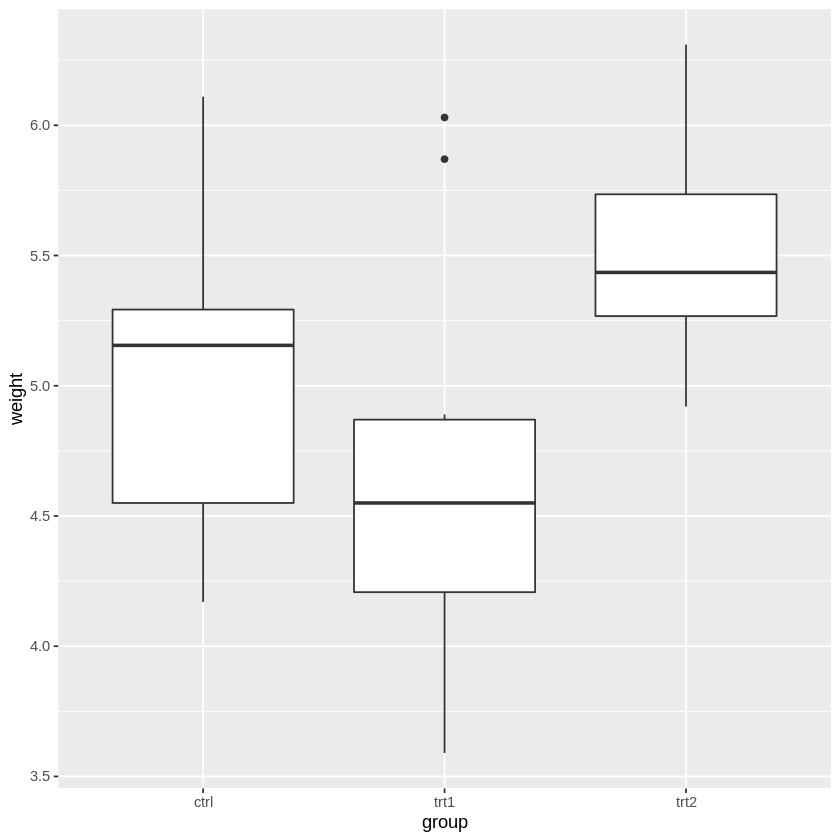

In [ ]:
PlantGrowth %>% ggplot(aes(x=group, y=weight)) + geom_boxplot()

In [ ]:
library(data.table)
metrics<-fread("/content/gene_expression.csv")


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
metrics %>% select(Protocol, `full reads before normalization`) %>% mutate(numberOfReads=`full reads before normalization`) %>% select(Protocol,numberOfReads) -> readsProtocol

In [ ]:
pairwise.t.test(readsProtocol$numberOfReads,readsProtocol$Protocol, p.adj="bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  readsProtocol$numberOfReads and readsProtocol$Protocol 

               ScriptSeq FFPE ScriptSeq Froz
ScriptSeq Froz 0.00047        -             
TruSeq Froz    1.4e-08        < 2e-16       

P value adjustment method: bonferroni 

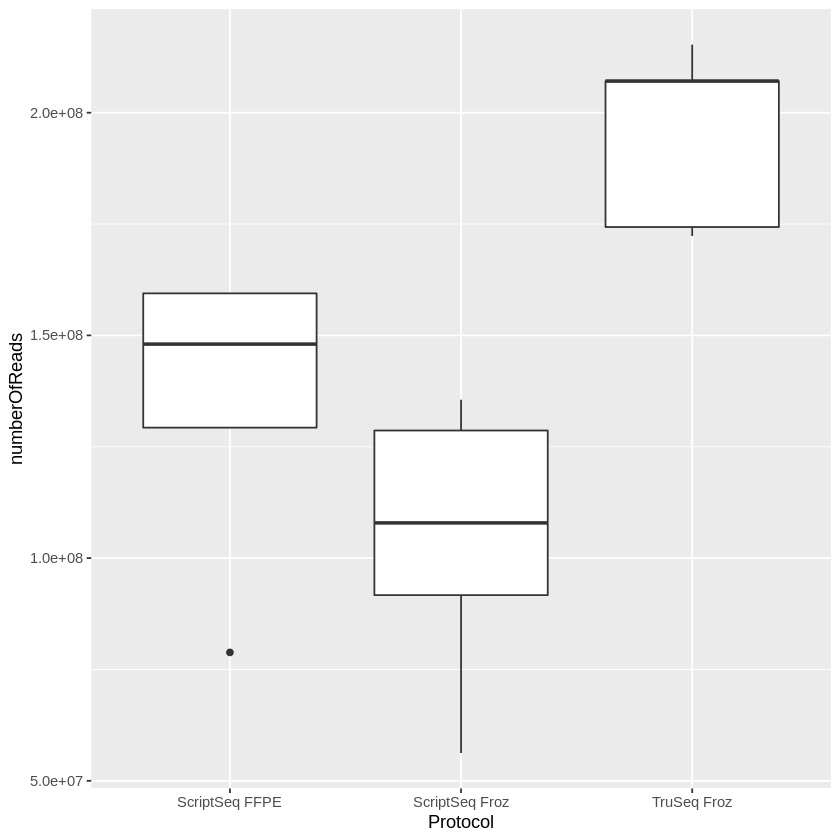

In [ ]:
readsProtocol %>% ggplot(aes(x=Protocol,y=numberOfReads)) + geom_boxplot()